In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
def fuzz_Mem_Func(var, typeOfMf, lst):
    if typeOfMf == 'trimf':
        return fuzz.trimf(var,lst)
    elif typeOfMf == 'gaussmf':
        mean, sigma = lst
        return fuzz.gaussmf(var, mean, sigma)
    elif typeOfMf == 'gauss2mf':
        mean1, sigma1, mean2, sigma2 = lst
        return fuzz.gauss2mf(var, mean1, sigma1, mean2, sigma2)
    elif typeOfMf == 'trapmf':
        return fuzz.trapmf(var, lst)
    elif typeOfMf == 'gbellmf':
        a,b,c = lst
        return fuzz.gbellmf(var, a, b, c)


In [3]:
def fuzz_Inputs(x_var, var):
    #   input linguistic terms for a linguistic variable. 
    lst = input(f'Enter the fuzzy inputs for variable {var}:').split(' ')

    In_ = [] #list to store the membership values.

    typeofMf = "trapmf"
    varType = [type(x_var[0])(x) for x in input(f"Enter the numbers for {lst[0]} {var}:").split(' ')]
    varmf = fuzz_Mem_Func(x_var, typeofMf, varType)
    In_.append(varmf)
    
    typeofMf = "trimf"
    varType = [type(x_var[0])(x) for x in input(f"Enter the numbers for {lst[1]} {var}:").split(' ')]
    varmf = fuzz_Mem_Func(x_var, typeofMf, varType)
    In_.append(varmf)
    
    typeofMf = "trapmf"
    varType = [type(x_var[0])(x) for x in input(f"Enter the numbers for {lst[2]} {var}:").split(' ')]
    varmf = fuzz_Mem_Func(x_var, typeofMf, varType)
    In_.append(varmf)
    
    # for i in range(len(lst)):
    #     # typeofMf = input(f'Enter the type of membership function for {lst[i]} {var}:')
    #     typeofMf = "trimf"
    #     varType = [type(x_var[0])(x) for x in input(f"Enter the numbers for {lst[i]} {var}:").split(' ')]
    #     varmf = fuzz_Mem_Func(x_var, typeofMf, varType)
    #     In_.append(varmf)
    
    lstoflst = [In_, lst]
    return lstoflst

In [4]:
def fuzz_plot_mf(x_var, var_, var_types, varName):
    print(f'The following plot shows the {varName}')
    fig, ax = plt.subplots(figsize=(8, 3))

    for i in range(len(var_)):
        ax.plot(x_var, var_[i], linewidth=1.5, label=var_types[i])
    ax.set_title(varName)
    ax.legend()
    plt.show()

In [5]:
def fuzz_make_rules(var1_types, var2_types, var3_types):
    rule_lst = []
    for i in range(len(var1_types)):
        rule1_ = []
        for j in range(len(var2_types)):
            rule2_ = []
            for k in range(len(var3_types)):
                rule2_.append(int(input(f'Enter the number corresponding to the above mean otot menu for rule {var1_types[i]}, {var2_types[j]} and {var3_types[k]}: ')))
            rule1_.append(rule2_)
        rule_lst.append(rule1_)
    return rule_lst


In [6]:
def fuzz_Interplot_mem(x_var, lst, singleton_value):
    memvalue = []
    for i in range(len(lst)):
        memvalue.append(fuzz.interp_membership(x_var, lst[i], singleton_value))

    return memvalue

In [7]:
def fuzz_rule(ror_memvalue, col_memvalue, lay_memvalue, output_, rule_lst):
    rule = [] #list stroing maped value of membership functions
    output_used = [] #list of membership values of the consequent used acc. to the decided rules
    for i in range(len(ror_memvalue)):
        for j in range(len(col_memvalue)):
            for k in range(len(lay_memvalue)):
                output_used.append(output_[rule_lst[i][j][k] - 1])
                rule.append(np.fmin(np.fmin(ror_memvalue[i], np.fmin(col_memvalue[j], lay_memvalue[k])), output_[rule_lst[i][j][k] - 1]))

    return [rule, output_used]

In [8]:
def fuzz_plot_outputMf(x_var, rule, output_used):
    zerolike = np.zeros_like(x_var)
    fig, ax0 = plt.subplots(figsize=(8, 3))

    for i in range(len(rule)):
        ax0.fill_between(x_var, zerolike, rule[i], facecolor='orange', alpha=0.7)
        ax0.plot(x_var, output_used[i], linewidth=0.5,linestyle='--')

    ax0.set_title('Output membership activity')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.show()

In [9]:
def fuzz_aggregation(rule):
    l = len(rule) - 1
    npfmax = np.fmax(rule[l - 1], rule[l])
    for i in range(len(rule) - 2):
        l = (len(rule) - 1) - (i + 1)
        npfmax = np.fmax(rule[l - 1], npfmax)

    return npfmax

In [10]:
def fuzz_defuzz(x_var, R_combined):
    output = fuzz.defuzz(x_var, R_combined, 'centroid')
    output_activation = fuzz.interp_membership(x_var, R_combined, output)
    lst = [output, output_activation]
    return lst

In [11]:
def fuzz_output(x_var, var, output, output_activation, R_combined):
    fig, ax0 = plt.subplots(figsize=(8, 3))
    zerolike = np.zeros_like(x_var)
    for i in range(len(var)):
        ax0.plot(x_var, var[i], linewidth=0.5, linestyle='--', )
    ax0.fill_between(x_var, zerolike, R_combined, facecolor='Orange', alpha=0.7)
    ax0.plot([output, output], [0, output_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.show()

    print(f'Output = {output}')

The following plot shows the rasiolf


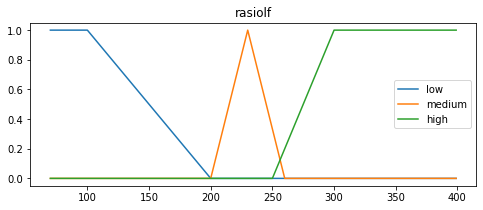

The following plot shows the saturasi


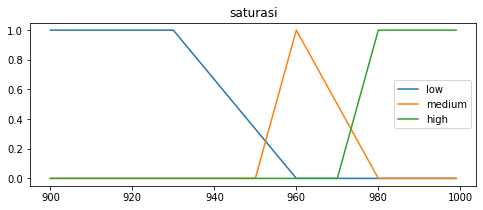

The following plot shows the mean otot


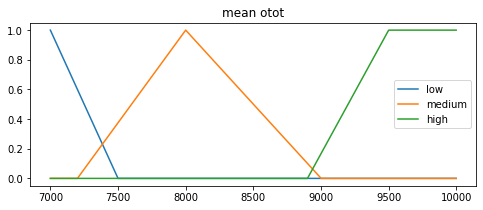

1 tidakcapek
2 capek
3 sangatcapek


In [12]:
# x, y, z = [int(x) for x in input("Enter the range of rasiolf:").split(' ')]
x, y, z = 70, 400, 1
x_rasiolh = np.arange(x, y, z)

# x, y, z = [float(x) for x in input("Enter the range of saturasi:").split(' ')]
x, y, z = 900, 1000, 1
x_saturasi = np.arange(x, y, z)

# x, y, z = [int(x) for x in input("Enter the range of fitnes level:").split(' ')]
x, y, z = 7000, 10000, 1
x_meanotot = np.arange(x, y, z)

x, y, z = 0, 2, 0.1
x_capek = np.arange(x, y, z)


r_,r_types = fuzz_Inputs(x_rasiolh, 'rasiolf') # low 0 0 100 200 medium 200 230 260 high 250 300 400 400
s_,s_types = fuzz_Inputs(x_saturasi, 'saturasi') # low 0 0 930 960 medium 950 960 980 high 970 980 1000 1000
m_,m_types = fuzz_Inputs(x_meanotot, 'mean otot') # low 0 0 7000 7500 medium 7200 8000 9000 high 8900 9500 10000 10000
c_,c_types = fuzz_Inputs(x_capek, 'kondisi') # tidakcapek 0 0 0 1 capek 0 1 2 sangatcapek 1 2 2 2


fuzz_plot_mf(x_rasiolh, r_, r_types, 'rasiolf') 
fuzz_plot_mf(x_saturasi, s_, s_types, 'saturasi') 
fuzz_plot_mf(x_meanotot, m_,m_types, 'mean otot') 

for i in range(len(c_types)):
    print(f'{i+1} {c_types[i]}')

In [13]:
# rule_lst = fuzz_make_rules(r_types, s_types, m_types)
rule_lst = [
            [[2,2,3]
            ,[2,3,3]
            ,[2,3,1]]
            ,[[2,2,3]
            ,[2,3,3]
            ,[2,2,3]]
            ,[[3,1,1]
            ,[3,1,1]
            ,[3,1,1]]
            ]


rasiolf = int(input('Enter Value for rasiolf:'))#253
saturasi = float(input('Enter value for saturasi:'))#980
meanotot = float(input('Enter value for meanotot:'))#9271

r_memvalue = fuzz_Interplot_mem(x_rasiolh, r_, rasiolf)
s_memvalue = fuzz_Interplot_mem(x_saturasi, s_, saturasi)
m_memvalue = fuzz_Interplot_mem(x_meanotot, m_, meanotot)

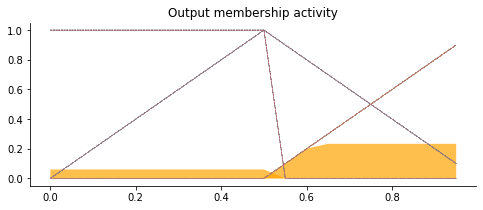

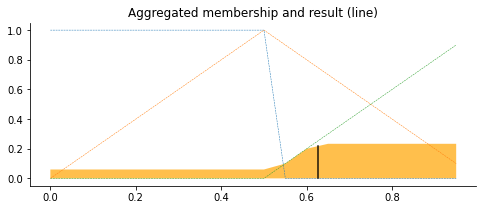

Output = 0.6271344232515895


In [14]:
rule, fitness_used = fuzz_rule(r_memvalue, s_memvalue, m_memvalue, c_, rule_lst)
fuzz_plot_outputMf(x_capek*0.5, rule, fitness_used)
R_combined = fuzz_aggregation(rule)

fitnessLevel, fitness_activation = fuzz_defuzz(x_capek*0.5, R_combined)
fuzz_output(x_capek*0.5, c_, fitnessLevel, fitness_activation, R_combined)